In [54]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# encodage des mots en Int
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
#import cv2 # erreur import
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

# pour parser le fichier train.json
import json

In [55]:
with open('train.json', 'r') as f:
    datas = json.load(f) # id, cuisine, ingredients[]

csv = []
occurence = dict()
for data in datas:
    for ingredient in data['ingredients']:
        cuisine = data['cuisine']
        
        # Ajout de la ligne id-cuisine-ingredient
        tmp = dict()
        tmp['id'] = str(data['id'])
        tmp['cuisine'] = cuisine
        tmp['ingredient'] = ingredient
        csv.append(tmp)
        
        # Comptage de l'occurence
        if not cuisine in occurence:
            occurence[cuisine] = dict()
        if not ingredient in occurence[cuisine]:
            occurence[cuisine][ingredient] = 0
        occurence[cuisine][ingredient] += 1

# Ajout des occurences dans le CSV
for ligne in csv:
    cuisine = ligne['cuisine']
    ingredient = ligne['ingredient']
    ligne['occurence'] = occurence[cuisine][ingredient]


# $ingredients contient tous les ingredients possibles


train = pd.DataFrame(csv)

In [56]:
df = train.copy()

In [57]:
df.head()

,cuisine,id,ingredient,occurence
0,greek,10259,romaine lettuce,39
1,greek,10259,black olives,31
2,greek,10259,grape tomatoes,26
3,greek,10259,garlic,216
4,greek,10259,pepper,203


In [58]:
# Encodage des valeurs

le_cuisine = LabelEncoder()
le_ingredient = LabelEncoder()

df['cuisine'] = le_cuisine.fit_transform(df['cuisine'])
df['ingredient'] = le_ingredient.fit_transform(df['ingredient'])

# Pour inverser l'encodage il faudra utiliser ces deux lignes :
#df['cuisine'] = le_cuisine.inverse_transform(df['cuisine'])
#df['ingredient'] = le_ingredient.inverse_transform(df['ingredient'])

df.head()

,cuisine,id,ingredient,occurence
0,6,10259,5222,39
1,6,10259,956,31
2,6,10259,3033,26
3,6,10259,2884,216
4,6,10259,4569,203


In [59]:
df['cuisine'].unique()

array([ 6, 16,  4,  7, 10, 17,  9, 13,  3,  1, 18, 19,  2,  0,  5, 11,  8,
       12, 14, 15])

In [60]:
len(df['cuisine'].unique())

20

In [61]:
df['ingredient'].unique()

array([5222,  956, 3033, ..., 3818, 6136, 2090])

In [62]:
len(df['ingredient'].unique())

6714

In [63]:
# Pour verifier que toutes les donnees sont bonnes
df['cuisine'].isnull().sum()

0

In [64]:
# Pour verifier que toutes les donnees sont bonnes
df['ingredient'].isnull().sum()

0

In [65]:
# Creation de la matrix

index = list(df['cuisine'].unique())
columns = list(df['ingredient'].unique())
index = sorted(index)
columns = sorted(columns)
 
util_df = pd.pivot_table(data = df, values = 'occurence', index = 'cuisine', columns = 'ingredient')

In [66]:
util_df

ingredient,0,1,2,3,4,5,6,7,8,9,...,6704,6705,6706,6707,6708,6709,6710,6711,6712,6713
cuisine,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,30.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,41.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,86.0,NaN
6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,2.0,1.0,2.0,3.0,47.0,NaN
7,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [67]:
util_df.fillna(0)

ingredient,0,1,2,3,4,5,6,7,8,9,...,6704,6705,6706,6707,6708,6709,6710,6711,6712,6713
cuisine,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,41.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,86.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,47.0,0.0
7,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [68]:
cuisines = df.cuisine.unique()
ingredients = df.ingredient.unique()

cuisine2idx = {o:i for i,o in enumerate(cuisines)}
ingredient2idx = {o:i for i,o in enumerate(ingredients)}

In [69]:
df['cuisine'] = df['cuisine'].apply(lambda x: cuisine2idx[x])
df['ingredient'] = df['ingredient'].apply(lambda x: ingredient2idx[x])
split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

(342873, 4) (85402, 4)


In [70]:
n_cuisines=len(df['cuisine'].unique())
n_ingredients=len(df['ingredient'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

In [75]:
cuisine_input=Input(shape=(1,),name='cuisine_input',dtype='int64')
cuisine_embedding=Embedding(n_cuisines,n_latent_factors,name='cuisine_embedding')(cuisine_input)
cuisine_vec =Flatten(name='FlattenUsers')(cuisine_embedding)

In [76]:
ingredient_input=Input(shape=(1,),name='ingredient_input',dtype='int64')
ingredient_embedding=Embedding(n_ingredients,n_latent_factors,name='ingredient_embedding')(ingredient_input)
ingredient_vec=Flatten(name='FlattenMovies')(ingredient_embedding)
#movie_vec

In [77]:
sim=dot([cuisine_vec,ingredient_vec],name='Simalarity-Dot-Product',axes=1)
model =keras.models.Model([cuisine_input, ingredient_input],sim)
# #model.summary()
# # A summary of the model is shown below-->

In [78]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [79]:
train.shape
batch_size=128
epochs=50

In [81]:
History = model.fit([train.cuisine,train.ingredient],train.occurence, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.cuisine,valid.ingredient],valid.occurence),
                              verbose = 1)


Train on 342873 samples, validate on 85402 samples
Epoch 1/50
342873/342873 [==============================] - 19s 56us/step - loss: 456764.8977 - val_loss: 447809.5987
Epoch 2/50
342873/342873 [==============================] - 19s 56us/step - loss: 450772.7843 - val_loss: 439468.3336
Epoch 3/50
342873/342873 [==============================] - 19s 56us/step - loss: 440401.4463 - val_loss: 427366.3272
Epoch 4/50
342873/342873 [==============================] - 20s 57us/step - loss: 426591.0588 - val_loss: 412110.3108
Epoch 5/50
342873/342873 [==============================] - 19s 56us/step - loss: 409731.7795 - val_loss: 394048.8136
Epoch 6/50
342873/342873 [==============================] - 19s 55us/step - loss: 390383.0042 - val_loss: 373754.5318
Epoch 7/50
342873/342873 [==============================] - 19s 56us/step - loss: 368966.2619 - val_loss: 351696.2985
Epoch 8/50
342873/342873 [==============================] - 19s 55us/step - loss: 346064.8958 - val_loss: 328455.6545
Epoc

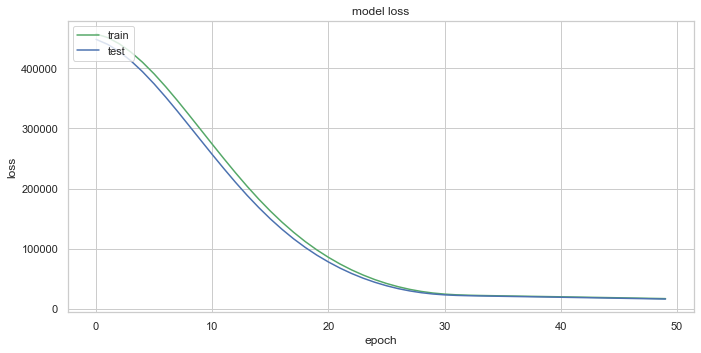

In [82]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()